The following work is based on networkx library & dataset available in the library (Zachary’s Karate Club). This work uses 4 clustering algorithm listed below & evalluation of the same.

Technique | Metric | Package.Function
--- | --- | ---
**k-means cluster** | NMI, ARS | sklearn.cluster.KMeans
**Agglomerative Clustering** | NMI, ARS | sklearn.cluster.AgglomerativeClustering
**Spectral Clustering** | NMI, ARS | sklearn.cluster.SpectralClustering
**Affinity Propagation** | NMI, ARS | sklearn.cluster.AffinityPropagation


The project is organised as below:
1. Data Loading
2. Data Prepration - Graph exploration
    A. Data Preparation
3. Cluster Analysis Evaluation
4. Fit Model & Comparison
4. Plotting using best method

### Load Libraries

In [1]:
from sklearn import cluster #cluster analysis function
import networkx as nx #network visualization library
from collections import defaultdict

#visualization libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

#general purpose libraries
import pandas as pd
import numpy as np

#evaluation functions
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

### Data loading

In [2]:
#networkx graph
Grph = nx.karate_club_graph()

#positioning as a networkx spring layout
pox = nx.spring_layout(Grph)

In [3]:
def draw_communities(Grph, membership, pox):
    fig, ax = plt.subplots(figsize=(16,9))
    
    # Convert membership list to a dict where key=club, value=list of students in club
    club_dict = defaultdict(list)
    for student, club in enumerate(membership):
        club_dict[club].append(student)
    
    # Normalize number of clubs for choosing a color
    norm = plt.Normalize(vmin=0, vmax=len(club_dict.keys()))
    
    for club, members in club_dict.items():
        nx.draw_networkx_nodes(Grph, pox,
                               nodelist=members,
                               node_color=cm.jet(norm(club)),
                               node_size=400,
                               alpha=0.8,
                               ax=ax)
    # Draw edges (social connections) and show final plot
    plt.title("Zachary's Karate Club - Communities", fontsize=16)
    nx.draw_networkx_edges(Grph, pox, alpha=0.5, ax=ax)

In [4]:
# True labels of the group each student (node) unded up in. Found via the original paper
y_true = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

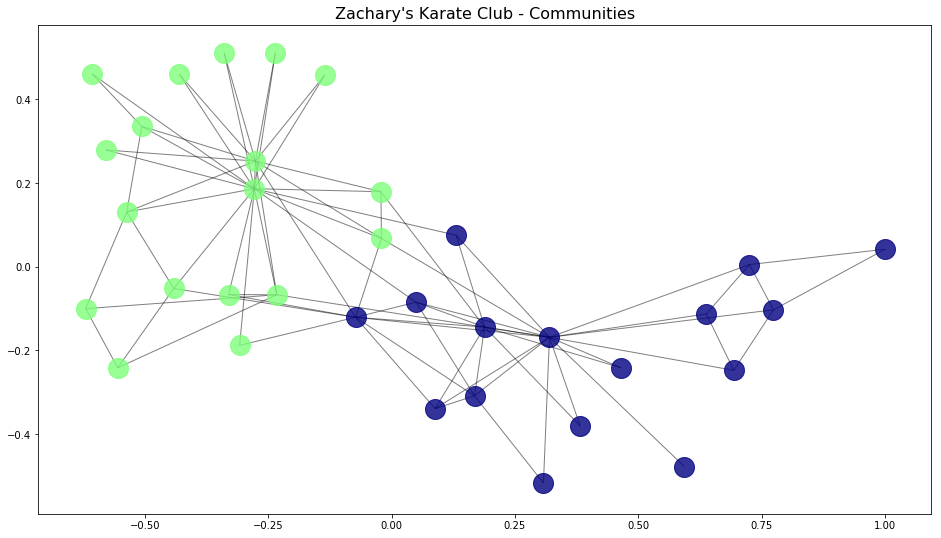

In [5]:
# Communities Graph
draw_communities(Grph, y_true, pox)

In [6]:
#edge matrix graph
def graph_to_edge_matrix(G):

    # Initialize edge matrix with zeros
    edge_mat = np.zeros((len(G), len(G)), dtype=int)

    # Loop to set 0 or 1 (diagonal elements are set to 1)
    for node in G:
        for neighbor in G.neighbors(node):
            edge_mat[node][neighbor] = 1
        edge_mat[node][node] = 1

    return edge_mat

In [7]:
edge_mat = graph_to_edge_matrix(Grph)
print('Shape of edge matrix is', edge_mat.shape)
print(edge_mat)

Shape of edge matrix is (34, 34)
[[1 1 1 ... 1 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 1 0]
 ...
 [1 0 0 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


## CLUSTERING ALGORITHM

1. **k-means cluster**

In [8]:
k_clusters = 2
results = []
algorithms = {}

algorithms['kmeans'] = cluster.KMeans(n_clusters=k_clusters, n_init=200)

2. **Agglomerative Clustering**

In [9]:
algorithms['agglom'] = cluster.AgglomerativeClustering(n_clusters=k_clusters, linkage="ward")

3. **Spectral Clustering**

In [10]:
algorithms['spectral'] = cluster.SpectralClustering(n_clusters=k_clusters, affinity="precomputed", n_init=200)

4. **Affinity Propagation**

In [11]:
algorithms['affinity'] = cluster.AffinityPropagation(damping=0.6)

In [12]:
#fit for all model
for model in algorithms.values():
    model.fit(edge_mat)
    results.append(list(model.labels_))

## Metrics to evaluate the fit

Below Metrics are used to evaluate the fit:
    1. _Normalized Mutual Information_ is a normalization of the Mutual Information (MI) score to scale the results between 0 (no mutual information) and 1 (perfect correlation).
    2. _Adjusted Rand Score_ computes a similarity measure between two clusters. ARS considers all pairs of samples and counts pairs that are assigned in the same or different clusters in the predicted and true clusters. 0 is the lowest similarity and 1 is the highest.

In [13]:
nmi_results = []
ars_results = []

y_true_val = y_true

# Append the results into lists
for y_pred in results:
    nmi_results.append(normalized_mutual_info_score(y_true_val, y_pred))
    ars_results.append(adjusted_rand_score(y_true_val, y_pred))

In [14]:
np.arange(len(nmi_results))

array([0, 1, 2, 3])

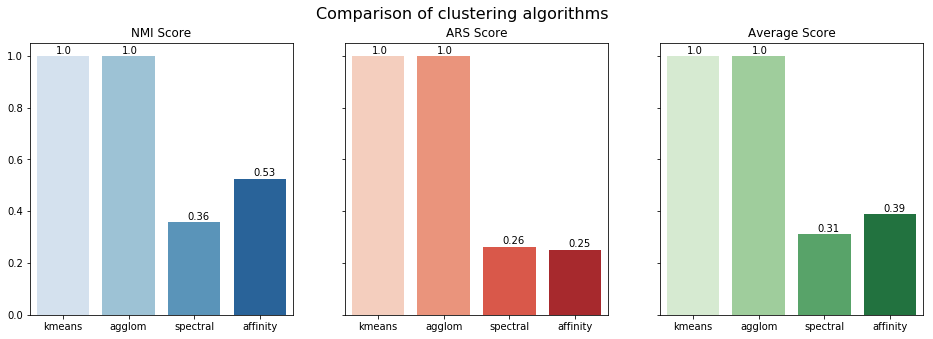

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16, 5))

x = np.arange(len(nmi_results))
avg = [sum(x) / 2 for x in zip(nmi_results, ars_results)]

xlabels = list(algorithms.keys())

sns.barplot(x, nmi_results, palette='Blues', ax=ax1)
sns.barplot(x, ars_results, palette='Reds', ax=ax2)
sns.barplot(x, avg, palette='Greens', ax=ax3)

ax1.set_title('NMI Score')
ax2.set_title('ARS Score')
ax3.set_title('Average Score')

# # Add the xlabels to the chart
ax1.set_xticklabels(xlabels)
ax2.set_xticklabels(xlabels)
ax3.set_xticklabels(xlabels)

# Add the actual value on top of each bar
for i, v in enumerate(zip(nmi_results, ars_results, avg)):
    ax1.text(i - 0.1, v[0] + 0.01, str(round(v[0], 2)))
    ax2.text(i - 0.1, v[1] + 0.01, str(round(v[1], 2)))
    ax3.text(i - 0.1, v[2] + 0.01, str(round(v[2], 2)))

# Show the final plot
plt.suptitle("Comparison of clustering algorithms", fontsize=16)
plt.show()

Text(0.5,0.98,'Comparison of clustering algorithms')

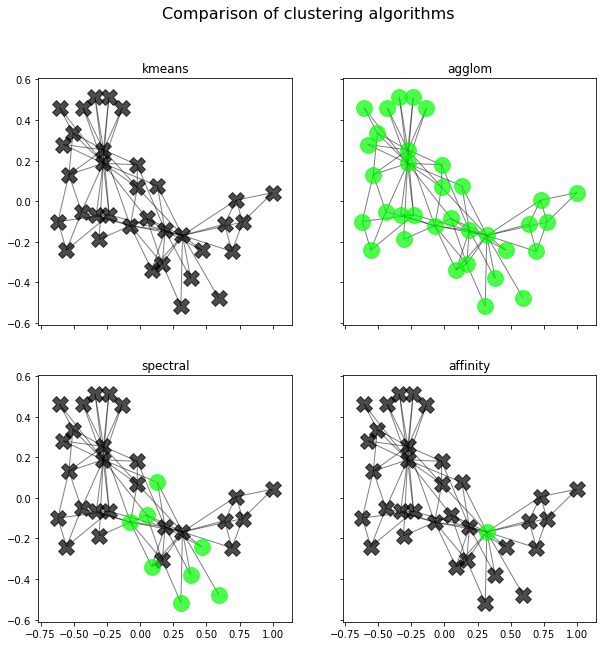

In [16]:
def draw_true_vs_pred(G, y_true, y_pred, pos, algo_name, ax):
    
    for student, club in enumerate(y_true):
        if y_pred is not None:
            if club == y_pred[student]:
                node_color = [0, 1, 0]
                node_shape = 'o'
            else:
                node_color = [0, 0, 0]
                node_shape = 'X'
                
        nx.draw_networkx_nodes(G, pos,
                               nodelist=[student],
                               node_color=node_color,
                               node_size=250,
                               alpha=0.7,
                               ax=ax,
                               node_shape=node_shape)
    
    # Draw edges and show final plot
    ax.set_title(algo_name)
    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10))

for algo_name, ax in zip(algorithms.keys(), [ax1, ax2, ax3, ax4]):
    draw_true_vs_pred(Grph, y_true, algorithms[algo_name].labels_, pox, algo_name, ax)

plt.suptitle("Comparison of clustering algorithms", fontsize=16)

In [17]:
#No of clusters considered for affinity clustering
cluster_centers_indices = algorithms['affinity'].cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
print(n_clusters_)

8


In [18]:
algorithms['affinity'].labels_

array([0, 2, 2, 2, 1, 1, 1, 2, 4, 3, 1, 1, 2, 2, 4, 4, 1, 2, 4, 4, 4, 2,
       4, 6, 5, 5, 6, 3, 3, 6, 4, 5, 7, 7], dtype=int64)

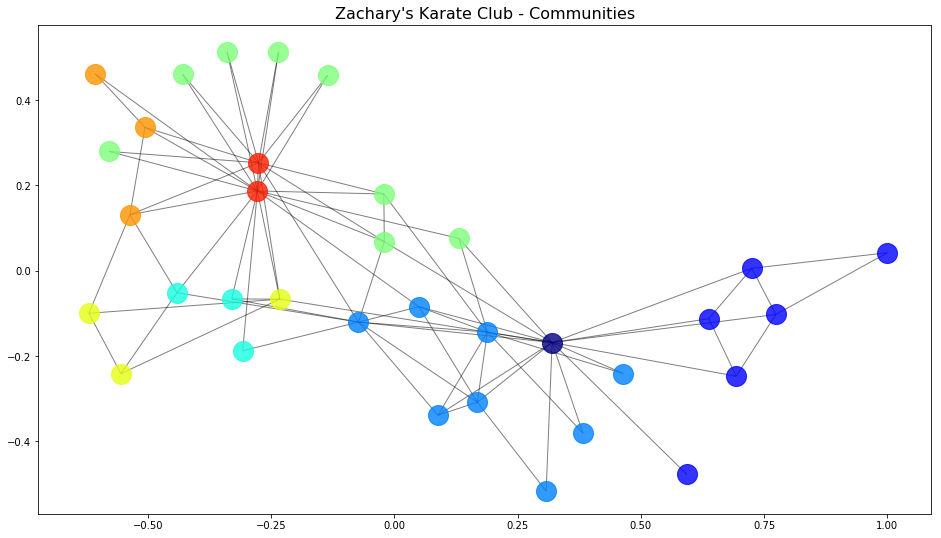

In [19]:
draw_communities(Grph, algorithms['affinity'].labels_, pox)

Big thanks to _Nikos Koufos_ & _Brendan Martin_ for their tutorial [K-Means & Other Clustering Algorithms: A Quick Intro with Python](https://www.learndatasci.com/tutorials/k-means-clustering-algorithms-python-intro/)